In [1]:
import pandas as pd
import numpy as np
from uuid import uuid4

In [2]:
pd.set_option('display.max_columns', None)
RUN_SERIAL = str(uuid4())

### 1. Import scores per school

In [3]:
path='/Users/juanmalagon/Desktop/Malagon-Haelermans/ftpdbicfes/4. Saber11/4. Clasificación de Planteles/'
df_2018_2 = pd.read_table(path + 'SB11-CLASIFI-PLANTELES-20182.txt'
                          , engine='python'
                          , encoding='utf-8'
                          , sep='¬'
                          , decimal=','
                          , dtype={'COLE_COD_DANE':'object'}
                          )
df_2018_1 = pd.read_table(path + 'SB11-CLASIFI-PLANTELES-20181.txt'
                          , engine='python'
                          , encoding='latin-1'
                          , sep='[\|\t]'
                          , decimal='.'
                          , dtype={'COLE_COD_DANE':'object'}                          
                          ).dropna(axis=1, how='all')

df_2018 = df_2018_1.append(df_2018_2)

In [4]:
df_2018

,PERIODO,COLE_COD_DANE,COLE_INST_NOMBRE,COLE_CODMPIO_COLEGIO,COLE_MPIO_MUNICIPIO,COLE_COD_DEPTO,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_GRADO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
0,20181,308001074789,AMERICAN SCHOOL,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,77,76,0.8184,0.8297,0.8215,0.8145,0.9203,0.8287,A+
1,20181,308573000450,INSTITUCION EDUCATIVA ASPAEN GIMNASIO ALTAMAR ...,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,M,34,34,0.8173,0.8321,0.8212,0.8125,0.9068,0.8274,A+
2,20181,308001073952,COLEGIO ALTAMIRA,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,127,120,0.8870,0.8848,0.8731,0.8633,0.9562,0.8832,A+
3,20181,308001101153,COLEGIO BRITANICO INTERNACIONAL,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,164,159,0.8626,0.8581,0.8374,0.8402,0.9496,0.8573,A+
4,20181,308573074909,COLEGIO SAN JOSÉ,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,248,238,0.8541,0.8493,0.8423,0.8378,0.9217,0.8517,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9145,20182,411001800116,ACADEMIA MILITAR MARISCAL SUCRE,11001,BOGOTÁ D.C.,11,BOGOTA,NO OFICIAL,11,A,MI,80,79,0.7697,0.7480,0.7270,0.7586,0.7699,0.7523,A
9146,20182,108001800065,INSTITUCION EDUCATIVA DISTRITAL VILLAS DE SAN ...,8001,BARRANQUILLA,8,ATLANTICO,OFICIAL,11,A,MI,68,59,0.6254,0.6244,0.5703,0.6692,0.6282,0.6228,C
9147,20182,344001005163,INSTITUCION EDUCATIVA FRANCISCO DE ASIS S.A.S.,44001,RIOHACHA,44,LA GUAJIRA,NO OFICIAL,26,A,MI,35,30,0.4685,0.5177,0.5197,0.5927,0.5655,0.5278,D
9148,20182,113001800263,INSTITUCION EDUCATIVA EL SALVADOR,13001,CARTAGENA DE INDIAS,13,BOLIVAR,OFICIAL,11,A,MI,214,183,0.5610,0.5725,0.5135,0.6234,0.5659,0.5674,D


### 2. Verify primary key integrity

In [5]:
len(df_2018_1), len(df_2018_1.COLE_COD_DANE.unique())

(281, 281)

In [6]:
len(df_2018_2), len(df_2018_2.COLE_COD_DANE.unique())

(9150, 8709)

In [7]:
df_2018[df_2018.duplicated(subset='COLE_COD_DANE', keep=False)].sort_values(by='COLE_COD_DANE')

,PERIODO,COLE_COD_DANE,COLE_INST_NOMBRE,COLE_CODMPIO_COLEGIO,COLE_MPIO_MUNICIPIO,COLE_COD_DEPTO,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_GRADO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
418,20182,105001000795,INST EDUC ALFREDO COCK ARANGO,5001,MEDELLÍN,5,ANTIOQUIA,OFICIAL,11,A,MI,153,148,0.6694,0.6764,0.6842,0.7255,0.6988,0.6897,B
419,20182,105001000795,INST EDUC ALFREDO COCK ARANGO,5001,MEDELLÍN,5,ANTIOQUIA,OFICIAL,26,A,MI,212,174,0.5313,0.5436,0.5348,0.6154,0.5797,0.5581,D
360,20182,105001011690,INST EDUC FEDERICO CARRASQUILLA,5001,MEDELLÍN,5,ANTIOQUIA,OFICIAL,11,A,MI,141,128,0.7054,0.6869,0.6896,0.7250,0.6933,0.7011,B
361,20182,105001011690,INST EDUC FEDERICO CARRASQUILLA,5001,MEDELLÍN,5,ANTIOQUIA,OFICIAL,26,A,MI,114,100,0.5262,0.5477,0.5350,0.6157,0.5317,0.5543,D
4133,20182,105001015211,INST EDUC LA LIBERTAD,5001,MEDELLÍN,5,ANTIOQUIA,OFICIAL,11,A,MI,85,76,0.6347,0.6353,0.6027,0.6338,0.6090,0.6253,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,20182,476020000249,IE ARTURO GOMEZ JARAMILLO,76020,ALCALÁ,76,VALLE,OFICIAL,11,A,MI,102,101,0.6011,0.6238,0.6171,0.6682,0.5978,0.6252,C
7397,20182,476736000258,IE HERACLIO URIBE URIBE,76736,SEVILLA,76,VALLE,OFICIAL,26,A,MI,83,72,0.5441,0.5765,0.5575,0.6116,0.5486,0.5706,D
7396,20182,476736000258,IE HERACLIO URIBE URIBE,76736,SEVILLA,76,VALLE,OFICIAL,11,A,MI,132,126,0.7133,0.7337,0.7273,0.7400,0.6699,0.7241,A
7889,20182,525843000017,INSTITUCIÒN EDUCATIVA DEPARTAMENTAL BRUSELAS,25843,VILLA DE SAN DIEGO DE UBATÉ,25,CUNDINAMARCA,OFICIAL,11,A,MI,85,80,0.6810,0.6920,0.6555,0.6995,0.6482,0.6794,B


In [8]:
df_2018 = df_2018[df_2018['COLE_GRADO']==11]

In [9]:
len(df_2018), len(df_2018.COLE_COD_DANE.unique())

(8862, 8860)

In [10]:
df_2018 = df_2018.drop_duplicates(subset='COLE_COD_DANE')

In [11]:
len(df_2018), len(df_2018.COLE_COD_DANE.unique())

(8860, 8860)

### 3. Import schools' features

In [13]:
path = "/Users/juanmalagon/Desktop/Malagon-Haelermans/dane/educacion_formal_2018/"

computing = pd.read_csv(path + 'Tenencia y numero de equipos de computo por sede educativa.csv'
                        , sep=';'
                        , encoding = 'UTF-8'
                        , dtype={'SEDE_CODIGO':'object'}
                       )

In [14]:
computing

,SEDE_CODIGO,PERIODO_ID,PERIODO_ANIO,EQUIPOCOM_ID,EQUIPOCOM_CODIGO,EQUIPOCOM_NOMBRE,SEDECOM_CANTIDAD,SEDECOM_CANT_SINUSO
0,154001000117,5,2018,2,2,Computadores portátiles,20,0
1,108001076219,5,2018,1,1,Computadores de escritorio,2,0
2,108001076219,5,2018,2,2,Computadores portátiles,22,0
3,108001076219,5,2018,3,3,Tabletas,17,0
4,154001000117,5,2018,3,3,Tabletas,30,0
...,...,...,...,...,...,...,...,...
80867,376001005758,5,2018,1,1,Computadores de escritorio,25,5
80868,376001005758,5,2018,2,2,Computadores portátiles,3,0
80869,252835002861,5,2018,3,3,Tabletas,20,0
80870,252835000591,5,2018,3,3,Tabletas,30,0


### 4. Pivot the features

In [15]:
computing = computing[['SEDE_CODIGO', 'EQUIPOCOM_NOMBRE', 'SEDECOM_CANTIDAD', 'SEDECOM_CANT_SINUSO']].groupby(by=['SEDE_CODIGO', 'EQUIPOCOM_NOMBRE']).sum().reset_index()

In [16]:
computing = computing.pivot(index=['SEDE_CODIGO'], columns=['EQUIPOCOM_NOMBRE'], values=['SEDECOM_CANTIDAD', 'SEDECOM_CANT_SINUSO'] ).reset_index().fillna(0)

In [17]:
computing.columns = [' '.join(col).strip() for col in computing.columns]

In [18]:
computing

,SEDE_CODIGO,SEDECOM_CANTIDAD Computadores de escritorio,SEDECOM_CANTIDAD Computadores portátiles,SEDECOM_CANTIDAD Tabletas,SEDECOM_CANT_SINUSO Computadores de escritorio,SEDECOM_CANT_SINUSO Computadores portátiles,SEDECOM_CANT_SINUSO Tabletas
0,105001000001,39.0,52.0,0.0,0.0,0.0,5.0
1,105001000027,21.0,28.0,0.0,0.0,0.0,0.0
2,105001000043,41.0,54.0,12.0,23.0,0.0,7.0
3,105001000078,21.0,40.0,9.0,1.0,0.0,0.0
4,105001000094,22.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
44686,499001001919,30.0,30.0,60.0,0.0,0.0,0.0
44687,499760000803,0.0,10.0,0.0,0.0,0.0,0.0
44688,499760000994,2.0,6.0,0.0,14.0,3.0,0.0
44689,499760001109,1.0,11.0,0.0,0.0,0.0,0.0


### 5. Verify primary key integrity

In [19]:
len(computing), len(computing.SEDE_CODIGO.unique())

(44691, 44691)

### 6. Join dataframes of scores and features

In [24]:
toy_set = pd.merge(
    left=df_2018
    ,right=computing
    , how='inner'
    , left_on='COLE_COD_DANE'
    , right_on='SEDE_CODIGO'
)

### 7. Drop redundant data / data not used in the mockup

In [25]:
toy_set.columns

Index(['PERIODO', 'COLE_COD_DANE', 'COLE_INST_NOMBRE', 'COLE_CODMPIO_COLEGIO',
       'COLE_MPIO_MUNICIPIO', 'COLE_COD_DEPTO', 'COLE_DEPTO_COLEGIO',
       'COLE_NATURALEZA', 'COLE_GRADO', 'COLE_CALENDARIO_COLEGIO',
       'COLE_GENEROPOBLACION', 'MATRICULADOS_ULTIMOS_3', 'EVALUADOS_ULTIMOS_3',
       'INDICE_MATEMATICAS', 'INDICE_C_NATURALES',
       'INDICE_SOCIALES_CIUDADANAS', 'INDICE_LECTURA_CRITICA', 'INDICE_INGLES',
       'INDICE_TOTAL', 'COLE_CATEGORIA', 'SEDE_CODIGO',
       'SEDECOM_CANTIDAD Computadores de escritorio',
       'SEDECOM_CANTIDAD Computadores portátiles', 'SEDECOM_CANTIDAD Tabletas',
       'SEDECOM_CANT_SINUSO Computadores de escritorio',
       'SEDECOM_CANT_SINUSO Computadores portátiles',
       'SEDECOM_CANT_SINUSO Tabletas'],
      dtype='object')

In [26]:
# Redundant

toy_set = toy_set.drop(columns=['PERIODO'
                                , 'COLE_INST_NOMBRE'
                                , 'COLE_CODMPIO_COLEGIO'
                                , 'COLE_COD_DEPTO'
                                , 'COLE_GRADO'
                                , 'SEDE_CODIGO'
                               ]
                      )

In [27]:
# Detailed scores per subject

toy_set = toy_set.drop(columns=['INDICE_MATEMATICAS'
                                , 'INDICE_C_NATURALES'
                                , 'INDICE_SOCIALES_CIUDADANAS'
                                , 'INDICE_LECTURA_CRITICA'
                                , 'INDICE_INGLES'
                               ]
                      )

In [28]:
# Aggregate features

toy_set['DESKTOPS'] = toy_set['SEDECOM_CANTIDAD Computadores de escritorio'] - toy_set['SEDECOM_CANT_SINUSO Computadores de escritorio']
toy_set['LAPTOPS'] = toy_set['SEDECOM_CANTIDAD Computadores portátiles'] - toy_set['SEDECOM_CANT_SINUSO Computadores portátiles']
toy_set['TABLETS'] = toy_set['SEDECOM_CANTIDAD Tabletas'] - toy_set['SEDECOM_CANT_SINUSO Tabletas']

In [29]:
toy_set = toy_set.drop(columns=['SEDECOM_CANTIDAD Computadores de escritorio'
                                ,'SEDECOM_CANTIDAD Computadores portátiles'
                                , 'SEDECOM_CANTIDAD Tabletas'
                                , 'SEDECOM_CANT_SINUSO Computadores de escritorio'
                                , 'SEDECOM_CANT_SINUSO Computadores portátiles'
                                , 'SEDECOM_CANT_SINUSO Tabletas'
                               ]
                      )

In [30]:
# Check number of cities

len(toy_set.COLE_MPIO_MUNICIPIO.unique())

1009

In [31]:
# Remove exploding categorical variables

toy_set.drop(columns='COLE_MPIO_MUNICIPIO', inplace=True)

In [32]:
toy_set.set_index(keys='COLE_COD_DANE'
                  , inplace=True
                  , drop=True
                  , verify_integrity=True
                 )

In [34]:
toy_set

,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_TOTAL,COLE_CATEGORIA,DESKTOPS,LAPTOPS,TABLETS
COLE_COD_DANE,,,,,,,,,,,
308001074789,ATLANTICO,NO OFICIAL,B,MI,77,76,0.8287,A+,43.0,3.0,0.0
308573000450,ATLANTICO,NO OFICIAL,B,M,34,34,0.8274,A+,15.0,37.0,13.0
308001073952,ATLANTICO,NO OFICIAL,B,MI,127,120,0.8832,A+,82.0,99.0,8.0
308573074909,ATLANTICO,NO OFICIAL,B,MI,248,238,0.8517,A+,223.0,170.0,25.0
308001011353,ATLANTICO,NO OFICIAL,B,MI,48,48,0.7959,A+,25.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
415764800023,BOYACA,NO OFICIAL,A,MI,15,15,0.7369,A,7.0,0.0,0.0
411001800116,BOGOTA,NO OFICIAL,A,MI,80,79,0.7523,A,88.0,15.0,0.0
108001800065,ATLANTICO,OFICIAL,A,MI,68,59,0.6228,C,0.0,0.0,100.0


### 8. Rename (translate) columns

In [35]:
toy_set.columns

Index(['COLE_DEPTO_COLEGIO', 'COLE_NATURALEZA', 'COLE_CALENDARIO_COLEGIO',
       'COLE_GENEROPOBLACION', 'MATRICULADOS_ULTIMOS_3', 'EVALUADOS_ULTIMOS_3',
       'INDICE_TOTAL', 'COLE_CATEGORIA', 'DESKTOPS', 'LAPTOPS', 'TABLETS'],
      dtype='object')

In [36]:
renames = {
    'COLE_DEPTO_COLEGIO':'REGION'
    , 'COLE_NATURALEZA':'PUBLIC_SCHOOL'
    , 'COLE_CALENDARIO_COLEGIO':'CALENDAR'
    , 'COLE_GENEROPOBLACION':'GENDER'
    , 'MATRICULADOS_ULTIMOS_3':'ENROLLED_LAST_3_YEARS'
    , 'EVALUADOS_ULTIMOS_3':'EVALUATED_LAST_3_YEARS'
    , 'INDICE_TOTAL':'TOTAL_SCORE'
    , 'COLE_CATEGORIA':'RANKING'
    , 'DESKTOPS':'DESKTOPS'
    , 'LAPTOPS':'LAPTOPS'
    , 'TABLETS':'TABLETS'
}

In [37]:
toy_set.rename(mapper=renames, axis=1, inplace=True)

In [38]:
toy_set

,REGION,PUBLIC_SCHOOL,CALENDAR,GENDER,ENROLLED_LAST_3_YEARS,EVALUATED_LAST_3_YEARS,TOTAL_SCORE,RANKING,DESKTOPS,LAPTOPS,TABLETS
COLE_COD_DANE,,,,,,,,,,,
308001074789,ATLANTICO,NO OFICIAL,B,MI,77,76,0.8287,A+,43.0,3.0,0.0
308573000450,ATLANTICO,NO OFICIAL,B,M,34,34,0.8274,A+,15.0,37.0,13.0
308001073952,ATLANTICO,NO OFICIAL,B,MI,127,120,0.8832,A+,82.0,99.0,8.0
308573074909,ATLANTICO,NO OFICIAL,B,MI,248,238,0.8517,A+,223.0,170.0,25.0
308001011353,ATLANTICO,NO OFICIAL,B,MI,48,48,0.7959,A+,25.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
415764800023,BOYACA,NO OFICIAL,A,MI,15,15,0.7369,A,7.0,0.0,0.0
411001800116,BOGOTA,NO OFICIAL,A,MI,80,79,0.7523,A,88.0,15.0,0.0
108001800065,ATLANTICO,OFICIAL,A,MI,68,59,0.6228,C,0.0,0.0,100.0


### 9. Create input set / target variable

In [39]:
target_variable = 'TOTAL_SCORE'

In [40]:
y = toy_set[target_variable].copy()

In [41]:
X = toy_set.drop(columns=['TOTAL_SCORE', 'RANKING']).copy()

In [42]:
def dummifier(df, column):
    dummies = pd.get_dummies(df[column], prefix=column).astype('int64')
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=[column], inplace=True)
    del(dummies)
    return df

### 10. Dummify categorical variables

In [43]:
X.dtypes

REGION                     object
PUBLIC_SCHOOL              object
CALENDAR                   object
GENDER                     object
ENROLLED_LAST_3_YEARS       int64
EVALUATED_LAST_3_YEARS      int64
DESKTOPS                  float64
LAPTOPS                   float64
TABLETS                   float64
dtype: object

In [44]:
object_columns = list(X.select_dtypes(include=['object']).columns)

In [45]:
for column in object_columns:
    X = dummifier(X, column)

In [46]:
# to-do: 
# import unidecode 
# outputString = unidecode.unidecode(string)

In [47]:
X

,ENROLLED_LAST_3_YEARS,EVALUATED_LAST_3_YEARS,DESKTOPS,LAPTOPS,TABLETS,REGION_AMAZONAS,REGION_ANTIOQUIA,REGION_ARAUCA,REGION_ATLANTICO,REGION_BOGOTA,REGION_BOLIVAR,REGION_BOYACA,REGION_CALDAS,REGION_CAQUETA,REGION_CASANARE,REGION_CAUCA,REGION_CESAR,REGION_CHOCO,REGION_CORDOBA,REGION_CUNDINAMARCA,REGION_GUAINIA,REGION_GUAVIARE,REGION_HUILA,REGION_LA GUAJIRA,REGION_MAGDALENA,REGION_META,REGION_NARIÑO,REGION_NORTE SANTANDER,REGION_PUTUMAYO,REGION_QUINDIO,REGION_RISARALDA,REGION_SAN ANDRES,REGION_SANTANDER,REGION_SUCRE,REGION_TOLIMA,REGION_VALLE,REGION_VAUPES,REGION_VICHADA,PUBLIC_SCHOOL_NO OFICIAL,PUBLIC_SCHOOL_OFICIAL,CALENDAR_A,CALENDAR_B,CALENDAR_O,GENDER_F,GENDER_M,GENDER_MI
COLE_COD_DANE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
308001074789,77,76,43.0,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
308573000450,34,34,15.0,37.0,13.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
308001073952,127,120,82.0,99.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
308573074909,248,238,223.0,170.0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
308001011353,48,48,25.0,10.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415764800023,15,15,7.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
411001800116,80,79,88.0,15.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
108001800065,68,59,0.0,0.0,100.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


### 11. Create train / validation / test sets

In [48]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.25, random_state=42)

### 12. Set up a CatBoost regressor

In [50]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [51]:
model0 = CatBoostRegressor(
    iterations=5000
    , depth=4
    , random_seed=42
    , save_snapshot=True
    , snapshot_file='snapshot.bkp'
    , train_dir=RUN_SERIAL
)

In [52]:
model0.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.019471
0:	learn: 0.0767803	test: 0.0776595	best: 0.0776595 (0)	total: 61.2ms	remaining: 5m 6s
1:	learn: 0.0761581	test: 0.0770447	best: 0.0770447 (1)	total: 62.1ms	remaining: 2m 35s
2:	learn: 0.0755558	test: 0.0764398	best: 0.0764398 (2)	total: 63.5ms	remaining: 1m 45s
3:	learn: 0.0750124	test: 0.0758959	best: 0.0758959 (3)	total: 64.6ms	remaining: 1m 20s
4:	learn: 0.0744696	test: 0.0753473	best: 0.0753473 (4)	total: 65.7ms	remaining: 1m 5s
5:	learn: 0.0739140	test: 0.0747856	best: 0.0747856 (5)	total: 66.5ms	remaining: 55.4s
6:	learn: 0.0733576	test: 0.0742264	best: 0.0742264 (6)	total: 67.5ms	remaining: 48.1s
7:	learn: 0.0728040	test: 0.0736634	best: 0.0736634 (7)	total: 68.1ms	remaining: 42.5s
8:	learn: 0.0722470	test: 0.0731112	best: 0.0731112 (8)	total: 68.8ms	remaining: 38.1s
9:	learn: 0.0717206	test: 0.0725896	best: 0.0725896 (9)	total: 69.6ms	remaining: 34.7s
10:	learn: 0.0712226	test: 0.0721026	best: 0.0721026 (10)	total: 70.6ms	remaining: 32s
11:	learn:

131:	learn: 0.0527189	test: 0.0541644	best: 0.0541644 (131)	total: 183ms	remaining: 6.74s
132:	learn: 0.0526822	test: 0.0541308	best: 0.0541308 (132)	total: 184ms	remaining: 6.72s
133:	learn: 0.0526291	test: 0.0540877	best: 0.0540877 (133)	total: 185ms	remaining: 6.72s
134:	learn: 0.0525863	test: 0.0540535	best: 0.0540535 (134)	total: 186ms	remaining: 6.7s
135:	learn: 0.0525492	test: 0.0540233	best: 0.0540233 (135)	total: 187ms	remaining: 6.69s
136:	learn: 0.0525046	test: 0.0539836	best: 0.0539836 (136)	total: 188ms	remaining: 6.68s
137:	learn: 0.0524595	test: 0.0539419	best: 0.0539419 (137)	total: 190ms	remaining: 6.68s
138:	learn: 0.0524223	test: 0.0539056	best: 0.0539056 (138)	total: 190ms	remaining: 6.66s
139:	learn: 0.0523722	test: 0.0538630	best: 0.0538630 (139)	total: 191ms	remaining: 6.64s
140:	learn: 0.0523286	test: 0.0538312	best: 0.0538312 (140)	total: 192ms	remaining: 6.63s
141:	learn: 0.0522951	test: 0.0538020	best: 0.0538020 (141)	total: 193ms	remaining: 6.62s
142:	learn:

338:	learn: 0.0481371	test: 0.0506889	best: 0.0506889 (338)	total: 367ms	remaining: 5.05s
339:	learn: 0.0481186	test: 0.0506732	best: 0.0506732 (339)	total: 368ms	remaining: 5.04s
340:	learn: 0.0480961	test: 0.0506595	best: 0.0506595 (340)	total: 369ms	remaining: 5.04s
341:	learn: 0.0480832	test: 0.0506530	best: 0.0506530 (341)	total: 369ms	remaining: 5.03s
342:	learn: 0.0480720	test: 0.0506481	best: 0.0506481 (342)	total: 370ms	remaining: 5.03s
343:	learn: 0.0480530	test: 0.0506431	best: 0.0506431 (343)	total: 371ms	remaining: 5.02s
344:	learn: 0.0480357	test: 0.0506362	best: 0.0506362 (344)	total: 372ms	remaining: 5.02s
345:	learn: 0.0480219	test: 0.0506282	best: 0.0506282 (345)	total: 373ms	remaining: 5.01s
346:	learn: 0.0480157	test: 0.0506250	best: 0.0506250 (346)	total: 374ms	remaining: 5.01s
347:	learn: 0.0480055	test: 0.0506193	best: 0.0506193 (347)	total: 375ms	remaining: 5.01s
348:	learn: 0.0479969	test: 0.0506135	best: 0.0506135 (348)	total: 375ms	remaining: 5s
349:	learn: 0

544:	learn: 0.0458674	test: 0.0495611	best: 0.0495611 (544)	total: 553ms	remaining: 4.52s
545:	learn: 0.0458515	test: 0.0495545	best: 0.0495545 (545)	total: 554ms	remaining: 4.52s
546:	learn: 0.0458499	test: 0.0495537	best: 0.0495537 (546)	total: 555ms	remaining: 4.52s
547:	learn: 0.0458356	test: 0.0495489	best: 0.0495489 (547)	total: 557ms	remaining: 4.52s
548:	learn: 0.0458273	test: 0.0495443	best: 0.0495443 (548)	total: 558ms	remaining: 4.52s
549:	learn: 0.0458198	test: 0.0495403	best: 0.0495403 (549)	total: 559ms	remaining: 4.52s
550:	learn: 0.0458092	test: 0.0495342	best: 0.0495342 (550)	total: 559ms	remaining: 4.52s
551:	learn: 0.0457984	test: 0.0495322	best: 0.0495322 (551)	total: 560ms	remaining: 4.51s
552:	learn: 0.0457878	test: 0.0495260	best: 0.0495260 (552)	total: 561ms	remaining: 4.51s
553:	learn: 0.0457782	test: 0.0495230	best: 0.0495230 (553)	total: 562ms	remaining: 4.51s
554:	learn: 0.0457687	test: 0.0495207	best: 0.0495207 (554)	total: 562ms	remaining: 4.5s
555:	learn:

749:	learn: 0.0442808	test: 0.0490149	best: 0.0490149 (749)	total: 741ms	remaining: 4.2s
750:	learn: 0.0442690	test: 0.0490125	best: 0.0490125 (750)	total: 742ms	remaining: 4.2s
751:	learn: 0.0442678	test: 0.0490123	best: 0.0490123 (751)	total: 743ms	remaining: 4.19s
752:	learn: 0.0442633	test: 0.0490120	best: 0.0490120 (752)	total: 744ms	remaining: 4.19s
753:	learn: 0.0442569	test: 0.0490093	best: 0.0490093 (753)	total: 745ms	remaining: 4.19s
754:	learn: 0.0442515	test: 0.0490079	best: 0.0490079 (754)	total: 746ms	remaining: 4.19s
755:	learn: 0.0442423	test: 0.0490060	best: 0.0490060 (755)	total: 746ms	remaining: 4.19s
756:	learn: 0.0442351	test: 0.0490041	best: 0.0490041 (756)	total: 747ms	remaining: 4.19s
757:	learn: 0.0442273	test: 0.0490017	best: 0.0490017 (757)	total: 748ms	remaining: 4.18s
758:	learn: 0.0442175	test: 0.0490005	best: 0.0490005 (758)	total: 749ms	remaining: 4.18s
759:	learn: 0.0442096	test: 0.0489987	best: 0.0489987 (759)	total: 749ms	remaining: 4.18s
760:	learn: 

958:	learn: 0.0429059	test: 0.0486966	best: 0.0486965 (957)	total: 968ms	remaining: 4.08s
959:	learn: 0.0428992	test: 0.0486938	best: 0.0486938 (959)	total: 970ms	remaining: 4.08s
960:	learn: 0.0428936	test: 0.0486922	best: 0.0486922 (960)	total: 971ms	remaining: 4.08s
961:	learn: 0.0428885	test: 0.0486925	best: 0.0486922 (960)	total: 972ms	remaining: 4.08s
962:	learn: 0.0428812	test: 0.0486920	best: 0.0486920 (962)	total: 973ms	remaining: 4.08s
963:	learn: 0.0428744	test: 0.0486906	best: 0.0486906 (963)	total: 974ms	remaining: 4.08s
964:	learn: 0.0428704	test: 0.0486895	best: 0.0486895 (964)	total: 975ms	remaining: 4.08s
965:	learn: 0.0428634	test: 0.0486878	best: 0.0486878 (965)	total: 976ms	remaining: 4.08s
966:	learn: 0.0428592	test: 0.0486859	best: 0.0486859 (966)	total: 977ms	remaining: 4.07s
967:	learn: 0.0428543	test: 0.0486839	best: 0.0486839 (967)	total: 978ms	remaining: 4.07s
968:	learn: 0.0428470	test: 0.0486812	best: 0.0486812 (968)	total: 978ms	remaining: 4.07s
969:	learn

1126:	learn: 0.0420251	test: 0.0485512	best: 0.0485512 (1126)	total: 1.16s	remaining: 3.98s
1127:	learn: 0.0420180	test: 0.0485523	best: 0.0485512 (1126)	total: 1.16s	remaining: 3.98s
1128:	learn: 0.0420116	test: 0.0485528	best: 0.0485512 (1126)	total: 1.16s	remaining: 3.97s
1129:	learn: 0.0420058	test: 0.0485537	best: 0.0485512 (1126)	total: 1.16s	remaining: 3.97s
1130:	learn: 0.0420015	test: 0.0485525	best: 0.0485512 (1126)	total: 1.16s	remaining: 3.97s
1131:	learn: 0.0419931	test: 0.0485505	best: 0.0485505 (1131)	total: 1.16s	remaining: 3.97s
1132:	learn: 0.0419862	test: 0.0485499	best: 0.0485499 (1132)	total: 1.16s	remaining: 3.96s
1133:	learn: 0.0419810	test: 0.0485500	best: 0.0485499 (1132)	total: 1.16s	remaining: 3.96s
1134:	learn: 0.0419754	test: 0.0485499	best: 0.0485499 (1134)	total: 1.16s	remaining: 3.96s
1135:	learn: 0.0419706	test: 0.0485488	best: 0.0485488 (1135)	total: 1.16s	remaining: 3.96s
1136:	learn: 0.0419648	test: 0.0485475	best: 0.0485475 (1136)	total: 1.16s	remai

1280:	learn: 0.0412564	test: 0.0484539	best: 0.0484530 (1278)	total: 1.34s	remaining: 3.91s
1281:	learn: 0.0412558	test: 0.0484540	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1282:	learn: 0.0412488	test: 0.0484546	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1283:	learn: 0.0412461	test: 0.0484554	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1284:	learn: 0.0412413	test: 0.0484537	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1285:	learn: 0.0412362	test: 0.0484542	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1286:	learn: 0.0412302	test: 0.0484553	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1287:	learn: 0.0412261	test: 0.0484558	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1288:	learn: 0.0412187	test: 0.0484541	best: 0.0484530 (1278)	total: 1.35s	remaining: 3.9s
1289:	learn: 0.0412111	test: 0.0484522	best: 0.0484522 (1289)	total: 1.35s	remaining: 3.9s
1290:	learn: 0.0412067	test: 0.0484533	best: 0.0484522 (1289)	total: 1.35s	remaining: 3.8

1457:	learn: 0.0404170	test: 0.0483617	best: 0.0483614 (1455)	total: 1.53s	remaining: 3.71s
1458:	learn: 0.0404130	test: 0.0483606	best: 0.0483606 (1458)	total: 1.53s	remaining: 3.71s
1459:	learn: 0.0404109	test: 0.0483598	best: 0.0483598 (1459)	total: 1.53s	remaining: 3.71s
1460:	learn: 0.0404089	test: 0.0483601	best: 0.0483598 (1459)	total: 1.53s	remaining: 3.71s
1461:	learn: 0.0404022	test: 0.0483589	best: 0.0483589 (1461)	total: 1.53s	remaining: 3.71s
1462:	learn: 0.0403978	test: 0.0483577	best: 0.0483577 (1462)	total: 1.53s	remaining: 3.7s
1463:	learn: 0.0403942	test: 0.0483571	best: 0.0483571 (1463)	total: 1.53s	remaining: 3.7s
1464:	learn: 0.0403897	test: 0.0483550	best: 0.0483550 (1464)	total: 1.53s	remaining: 3.7s
1465:	learn: 0.0403861	test: 0.0483546	best: 0.0483546 (1465)	total: 1.53s	remaining: 3.7s
1466:	learn: 0.0403826	test: 0.0483549	best: 0.0483546 (1465)	total: 1.53s	remaining: 3.7s
1467:	learn: 0.0403795	test: 0.0483543	best: 0.0483543 (1467)	total: 1.53s	remaining:

1653:	learn: 0.0395887	test: 0.0483025	best: 0.0482979 (1643)	total: 1.71s	remaining: 3.46s
1654:	learn: 0.0395864	test: 0.0483028	best: 0.0482979 (1643)	total: 1.71s	remaining: 3.46s
1655:	learn: 0.0395828	test: 0.0483030	best: 0.0482979 (1643)	total: 1.71s	remaining: 3.46s
1656:	learn: 0.0395791	test: 0.0483039	best: 0.0482979 (1643)	total: 1.71s	remaining: 3.46s
1657:	learn: 0.0395733	test: 0.0483051	best: 0.0482979 (1643)	total: 1.72s	remaining: 3.47s
1658:	learn: 0.0395655	test: 0.0483034	best: 0.0482979 (1643)	total: 1.72s	remaining: 3.47s
1659:	learn: 0.0395599	test: 0.0483037	best: 0.0482979 (1643)	total: 1.72s	remaining: 3.47s
1660:	learn: 0.0395547	test: 0.0483038	best: 0.0482979 (1643)	total: 1.73s	remaining: 3.47s
1661:	learn: 0.0395495	test: 0.0483032	best: 0.0482979 (1643)	total: 1.73s	remaining: 3.47s
1662:	learn: 0.0395490	test: 0.0483033	best: 0.0482979 (1643)	total: 1.73s	remaining: 3.47s
1663:	learn: 0.0395461	test: 0.0483041	best: 0.0482979 (1643)	total: 1.73s	remai

1842:	learn: 0.0388587	test: 0.0482372	best: 0.0482352 (1837)	total: 1.92s	remaining: 3.29s
1843:	learn: 0.0388563	test: 0.0482373	best: 0.0482352 (1837)	total: 1.92s	remaining: 3.29s
1844:	learn: 0.0388540	test: 0.0482369	best: 0.0482352 (1837)	total: 1.92s	remaining: 3.29s
1845:	learn: 0.0388482	test: 0.0482379	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.29s
1846:	learn: 0.0388454	test: 0.0482376	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.29s
1847:	learn: 0.0388434	test: 0.0482375	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.29s
1848:	learn: 0.0388390	test: 0.0482365	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.29s
1849:	learn: 0.0388365	test: 0.0482370	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.28s
1850:	learn: 0.0388337	test: 0.0482367	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.28s
1851:	learn: 0.0388277	test: 0.0482372	best: 0.0482352 (1837)	total: 1.93s	remaining: 3.28s
1852:	learn: 0.0388234	test: 0.0482382	best: 0.0482352 (1837)	total: 1.93s	remai

2037:	learn: 0.0382061	test: 0.0481917	best: 0.0481917 (2037)	total: 2.11s	remaining: 3.06s
2038:	learn: 0.0382057	test: 0.0481917	best: 0.0481917 (2038)	total: 2.11s	remaining: 3.06s
2039:	learn: 0.0382024	test: 0.0481908	best: 0.0481908 (2039)	total: 2.11s	remaining: 3.06s
2040:	learn: 0.0381990	test: 0.0481906	best: 0.0481906 (2040)	total: 2.11s	remaining: 3.06s
2041:	learn: 0.0381958	test: 0.0481914	best: 0.0481906 (2040)	total: 2.11s	remaining: 3.06s
2042:	learn: 0.0381929	test: 0.0481903	best: 0.0481903 (2042)	total: 2.11s	remaining: 3.06s
2043:	learn: 0.0381925	test: 0.0481905	best: 0.0481903 (2042)	total: 2.12s	remaining: 3.06s
2044:	learn: 0.0381887	test: 0.0481915	best: 0.0481903 (2042)	total: 2.12s	remaining: 3.06s
2045:	learn: 0.0381881	test: 0.0481916	best: 0.0481903 (2042)	total: 2.12s	remaining: 3.06s
2046:	learn: 0.0381833	test: 0.0481921	best: 0.0481903 (2042)	total: 2.12s	remaining: 3.06s
2047:	learn: 0.0381813	test: 0.0481922	best: 0.0481903 (2042)	total: 2.12s	remai

2230:	learn: 0.0375750	test: 0.0481588	best: 0.0481588 (2230)	total: 2.29s	remaining: 2.85s
2231:	learn: 0.0375747	test: 0.0481590	best: 0.0481588 (2230)	total: 2.29s	remaining: 2.84s
2232:	learn: 0.0375726	test: 0.0481589	best: 0.0481588 (2230)	total: 2.29s	remaining: 2.84s
2233:	learn: 0.0375702	test: 0.0481591	best: 0.0481588 (2230)	total: 2.29s	remaining: 2.84s
2234:	learn: 0.0375685	test: 0.0481596	best: 0.0481588 (2230)	total: 2.3s	remaining: 2.84s
2235:	learn: 0.0375655	test: 0.0481591	best: 0.0481588 (2230)	total: 2.3s	remaining: 2.84s
2236:	learn: 0.0375638	test: 0.0481602	best: 0.0481588 (2230)	total: 2.3s	remaining: 2.84s
2237:	learn: 0.0375595	test: 0.0481609	best: 0.0481588 (2230)	total: 2.3s	remaining: 2.84s
2238:	learn: 0.0375570	test: 0.0481605	best: 0.0481588 (2230)	total: 2.3s	remaining: 2.84s
2239:	learn: 0.0375529	test: 0.0481597	best: 0.0481588 (2230)	total: 2.3s	remaining: 2.83s
2240:	learn: 0.0375497	test: 0.0481577	best: 0.0481577 (2240)	total: 2.3s	remaining: 2

2397:	learn: 0.0370314	test: 0.0481194	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.69s
2398:	learn: 0.0370311	test: 0.0481195	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.69s
2399:	learn: 0.0370292	test: 0.0481188	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.69s
2400:	learn: 0.0370269	test: 0.0481185	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.69s
2401:	learn: 0.0370243	test: 0.0481176	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.68s
2402:	learn: 0.0370227	test: 0.0481185	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.68s
2403:	learn: 0.0370197	test: 0.0481180	best: 0.0481173 (2390)	total: 2.48s	remaining: 2.68s
2404:	learn: 0.0370195	test: 0.0481181	best: 0.0481173 (2390)	total: 2.49s	remaining: 2.68s
2405:	learn: 0.0370160	test: 0.0481178	best: 0.0481173 (2390)	total: 2.49s	remaining: 2.68s
2406:	learn: 0.0370134	test: 0.0481185	best: 0.0481173 (2390)	total: 2.49s	remaining: 2.68s
2407:	learn: 0.0370112	test: 0.0481190	best: 0.0481173 (2390)	total: 2.49s	remai

2597:	learn: 0.0364086	test: 0.0480794	best: 0.0480768 (2585)	total: 2.66s	remaining: 2.46s
2598:	learn: 0.0364044	test: 0.0480796	best: 0.0480768 (2585)	total: 2.66s	remaining: 2.46s
2599:	learn: 0.0363971	test: 0.0480805	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.46s
2600:	learn: 0.0363931	test: 0.0480802	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.46s
2601:	learn: 0.0363890	test: 0.0480794	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.46s
2602:	learn: 0.0363877	test: 0.0480794	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.46s
2603:	learn: 0.0363809	test: 0.0480776	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.46s
2604:	learn: 0.0363782	test: 0.0480775	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.46s
2605:	learn: 0.0363756	test: 0.0480774	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.45s
2606:	learn: 0.0363754	test: 0.0480774	best: 0.0480768 (2585)	total: 2.67s	remaining: 2.45s
2607:	learn: 0.0363740	test: 0.0480780	best: 0.0480768 (2585)	total: 2.67s	remai

2804:	learn: 0.0358074	test: 0.0480415	best: 0.0480395 (2789)	total: 2.9s	remaining: 2.27s
2805:	learn: 0.0357992	test: 0.0480390	best: 0.0480390 (2805)	total: 2.9s	remaining: 2.27s
2806:	learn: 0.0357939	test: 0.0480375	best: 0.0480375 (2806)	total: 2.9s	remaining: 2.27s
2807:	learn: 0.0357919	test: 0.0480382	best: 0.0480375 (2806)	total: 2.9s	remaining: 2.27s
2808:	learn: 0.0357897	test: 0.0480374	best: 0.0480374 (2808)	total: 2.9s	remaining: 2.26s
2809:	learn: 0.0357849	test: 0.0480370	best: 0.0480370 (2809)	total: 2.9s	remaining: 2.26s
2810:	learn: 0.0357817	test: 0.0480376	best: 0.0480370 (2809)	total: 2.9s	remaining: 2.26s
2811:	learn: 0.0357789	test: 0.0480387	best: 0.0480370 (2809)	total: 2.9s	remaining: 2.26s
2812:	learn: 0.0357744	test: 0.0480389	best: 0.0480370 (2809)	total: 2.9s	remaining: 2.26s
2813:	learn: 0.0357742	test: 0.0480390	best: 0.0480370 (2809)	total: 2.91s	remaining: 2.26s
2814:	learn: 0.0357692	test: 0.0480382	best: 0.0480370 (2809)	total: 2.91s	remaining: 2.2

3011:	learn: 0.0352254	test: 0.0480130	best: 0.0480114 (3006)	total: 3.08s	remaining: 2.04s
3012:	learn: 0.0352239	test: 0.0480135	best: 0.0480114 (3006)	total: 3.08s	remaining: 2.03s
3013:	learn: 0.0352228	test: 0.0480135	best: 0.0480114 (3006)	total: 3.08s	remaining: 2.03s
3014:	learn: 0.0352226	test: 0.0480135	best: 0.0480114 (3006)	total: 3.09s	remaining: 2.03s
3015:	learn: 0.0352207	test: 0.0480131	best: 0.0480114 (3006)	total: 3.09s	remaining: 2.03s
3016:	learn: 0.0352184	test: 0.0480140	best: 0.0480114 (3006)	total: 3.09s	remaining: 2.03s
3017:	learn: 0.0352137	test: 0.0480127	best: 0.0480114 (3006)	total: 3.09s	remaining: 2.03s
3018:	learn: 0.0352125	test: 0.0480126	best: 0.0480114 (3006)	total: 3.09s	remaining: 2.03s
3019:	learn: 0.0352085	test: 0.0480113	best: 0.0480113 (3019)	total: 3.09s	remaining: 2.03s
3020:	learn: 0.0352053	test: 0.0480107	best: 0.0480107 (3020)	total: 3.09s	remaining: 2.02s
3021:	learn: 0.0352043	test: 0.0480112	best: 0.0480107 (3020)	total: 3.09s	remai

3227:	learn: 0.0346758	test: 0.0479962	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3228:	learn: 0.0346748	test: 0.0479964	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3229:	learn: 0.0346709	test: 0.0479952	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3230:	learn: 0.0346639	test: 0.0479933	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3231:	learn: 0.0346591	test: 0.0479930	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3232:	learn: 0.0346590	test: 0.0479930	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3233:	learn: 0.0346585	test: 0.0479936	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3234:	learn: 0.0346580	test: 0.0479943	best: 0.0479899 (3194)	total: 3.27s	remaining: 1.79s
3235:	learn: 0.0346556	test: 0.0479938	best: 0.0479899 (3194)	total: 3.28s	remaining: 1.78s
3236:	learn: 0.0346533	test: 0.0479934	best: 0.0479899 (3194)	total: 3.28s	remaining: 1.78s
3237:	learn: 0.0346479	test: 0.0479926	best: 0.0479899 (3194)	total: 3.28s	remai

3424:	learn: 0.0341892	test: 0.0479739	best: 0.0479719 (3421)	total: 3.45s	remaining: 1.59s
3425:	learn: 0.0341877	test: 0.0479734	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.59s
3426:	learn: 0.0341846	test: 0.0479738	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.59s
3427:	learn: 0.0341829	test: 0.0479728	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.59s
3428:	learn: 0.0341815	test: 0.0479731	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.58s
3429:	learn: 0.0341794	test: 0.0479727	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.58s
3430:	learn: 0.0341756	test: 0.0479732	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.58s
3431:	learn: 0.0341724	test: 0.0479731	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.58s
3432:	learn: 0.0341653	test: 0.0479722	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.58s
3433:	learn: 0.0341609	test: 0.0479738	best: 0.0479719 (3421)	total: 3.46s	remaining: 1.58s
3434:	learn: 0.0341577	test: 0.0479734	best: 0.0479719 (3421)	total: 3.47s	remai

3608:	learn: 0.0337146	test: 0.0479692	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3609:	learn: 0.0337127	test: 0.0479698	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3610:	learn: 0.0337062	test: 0.0479681	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3611:	learn: 0.0337056	test: 0.0479685	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3612:	learn: 0.0337029	test: 0.0479701	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3613:	learn: 0.0336979	test: 0.0479705	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3614:	learn: 0.0336965	test: 0.0479704	best: 0.0479653 (3557)	total: 3.64s	remaining: 1.4s
3615:	learn: 0.0336918	test: 0.0479698	best: 0.0479653 (3557)	total: 3.65s	remaining: 1.4s
3616:	learn: 0.0336896	test: 0.0479685	best: 0.0479653 (3557)	total: 3.65s	remaining: 1.39s
3617:	learn: 0.0336895	test: 0.0479686	best: 0.0479653 (3557)	total: 3.65s	remaining: 1.39s
3618:	learn: 0.0336865	test: 0.0479685	best: 0.0479653 (3557)	total: 3.65s	remaining: 1.

3809:	learn: 0.0332645	test: 0.0479496	best: 0.0479495 (3801)	total: 3.85s	remaining: 1.2s
3810:	learn: 0.0332614	test: 0.0479504	best: 0.0479495 (3801)	total: 3.88s	remaining: 1.21s
3811:	learn: 0.0332613	test: 0.0479505	best: 0.0479495 (3801)	total: 3.88s	remaining: 1.21s
3812:	learn: 0.0332606	test: 0.0479511	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.21s
3813:	learn: 0.0332597	test: 0.0479515	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.21s
3814:	learn: 0.0332556	test: 0.0479506	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.21s
3815:	learn: 0.0332548	test: 0.0479510	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.21s
3816:	learn: 0.0332542	test: 0.0479517	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.21s
3817:	learn: 0.0332510	test: 0.0479502	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.2s
3818:	learn: 0.0332496	test: 0.0479502	best: 0.0479495 (3801)	total: 3.89s	remaining: 1.2s
3819:	learn: 0.0332489	test: 0.0479505	best: 0.0479495 (3801)	total: 3.89s	remainin

3979:	learn: 0.0328948	test: 0.0479370	best: 0.0479366 (3924)	total: 4.04s	remaining: 1.03s
3980:	learn: 0.0328905	test: 0.0479368	best: 0.0479366 (3924)	total: 4.04s	remaining: 1.03s
3981:	learn: 0.0328888	test: 0.0479368	best: 0.0479366 (3924)	total: 4.04s	remaining: 1.03s
3982:	learn: 0.0328886	test: 0.0479367	best: 0.0479366 (3924)	total: 4.04s	remaining: 1.03s
3983:	learn: 0.0328851	test: 0.0479374	best: 0.0479366 (3924)	total: 4.04s	remaining: 1.03s
3984:	learn: 0.0328835	test: 0.0479377	best: 0.0479366 (3924)	total: 4.04s	remaining: 1.03s
3985:	learn: 0.0328794	test: 0.0479391	best: 0.0479366 (3924)	total: 4.05s	remaining: 1.03s
3986:	learn: 0.0328771	test: 0.0479379	best: 0.0479366 (3924)	total: 4.05s	remaining: 1.03s
3987:	learn: 0.0328743	test: 0.0479364	best: 0.0479364 (3987)	total: 4.05s	remaining: 1.03s
3988:	learn: 0.0328726	test: 0.0479366	best: 0.0479364 (3987)	total: 4.05s	remaining: 1.03s
3989:	learn: 0.0328716	test: 0.0479371	best: 0.0479364 (3987)	total: 4.05s	remai

4166:	learn: 0.0324672	test: 0.0479416	best: 0.0479329 (4004)	total: 4.22s	remaining: 845ms
4167:	learn: 0.0324652	test: 0.0479407	best: 0.0479329 (4004)	total: 4.23s	remaining: 844ms
4168:	learn: 0.0324634	test: 0.0479402	best: 0.0479329 (4004)	total: 4.23s	remaining: 843ms
4169:	learn: 0.0324633	test: 0.0479403	best: 0.0479329 (4004)	total: 4.23s	remaining: 842ms
4170:	learn: 0.0324630	test: 0.0479408	best: 0.0479329 (4004)	total: 4.23s	remaining: 841ms
4171:	learn: 0.0324620	test: 0.0479410	best: 0.0479329 (4004)	total: 4.23s	remaining: 840ms
4172:	learn: 0.0324588	test: 0.0479398	best: 0.0479329 (4004)	total: 4.23s	remaining: 839ms
4173:	learn: 0.0324575	test: 0.0479406	best: 0.0479329 (4004)	total: 4.23s	remaining: 838ms
4174:	learn: 0.0324563	test: 0.0479411	best: 0.0479329 (4004)	total: 4.23s	remaining: 837ms
4175:	learn: 0.0324534	test: 0.0479410	best: 0.0479329 (4004)	total: 4.23s	remaining: 836ms
4176:	learn: 0.0324494	test: 0.0479407	best: 0.0479329 (4004)	total: 4.24s	remai

4351:	learn: 0.0320567	test: 0.0479336	best: 0.0479316 (4299)	total: 4.41s	remaining: 656ms
4352:	learn: 0.0320559	test: 0.0479339	best: 0.0479316 (4299)	total: 4.41s	remaining: 655ms
4353:	learn: 0.0320558	test: 0.0479342	best: 0.0479316 (4299)	total: 4.41s	remaining: 654ms
4354:	learn: 0.0320533	test: 0.0479358	best: 0.0479316 (4299)	total: 4.41s	remaining: 653ms
4355:	learn: 0.0320499	test: 0.0479360	best: 0.0479316 (4299)	total: 4.41s	remaining: 652ms
4356:	learn: 0.0320497	test: 0.0479360	best: 0.0479316 (4299)	total: 4.41s	remaining: 651ms
4357:	learn: 0.0320483	test: 0.0479361	best: 0.0479316 (4299)	total: 4.41s	remaining: 650ms
4358:	learn: 0.0320461	test: 0.0479356	best: 0.0479316 (4299)	total: 4.42s	remaining: 649ms
4359:	learn: 0.0320429	test: 0.0479360	best: 0.0479316 (4299)	total: 4.42s	remaining: 648ms
4360:	learn: 0.0320411	test: 0.0479360	best: 0.0479316 (4299)	total: 4.42s	remaining: 647ms
4361:	learn: 0.0320397	test: 0.0479356	best: 0.0479316 (4299)	total: 4.42s	remai

4545:	learn: 0.0316808	test: 0.0479356	best: 0.0479306 (4512)	total: 4.59s	remaining: 459ms
4546:	learn: 0.0316803	test: 0.0479355	best: 0.0479306 (4512)	total: 4.59s	remaining: 458ms
4547:	learn: 0.0316784	test: 0.0479361	best: 0.0479306 (4512)	total: 4.6s	remaining: 457ms
4548:	learn: 0.0316771	test: 0.0479372	best: 0.0479306 (4512)	total: 4.6s	remaining: 456ms
4549:	learn: 0.0316746	test: 0.0479371	best: 0.0479306 (4512)	total: 4.6s	remaining: 455ms
4550:	learn: 0.0316703	test: 0.0479366	best: 0.0479306 (4512)	total: 4.6s	remaining: 454ms
4551:	learn: 0.0316695	test: 0.0479365	best: 0.0479306 (4512)	total: 4.6s	remaining: 453ms
4552:	learn: 0.0316687	test: 0.0479366	best: 0.0479306 (4512)	total: 4.6s	remaining: 452ms
4553:	learn: 0.0316682	test: 0.0479368	best: 0.0479306 (4512)	total: 4.6s	remaining: 451ms
4554:	learn: 0.0316666	test: 0.0479378	best: 0.0479306 (4512)	total: 4.6s	remaining: 450ms
4555:	learn: 0.0316656	test: 0.0479379	best: 0.0479306 (4512)	total: 4.6s	remaining: 449

4764:	learn: 0.0312843	test: 0.0479410	best: 0.0479306 (4512)	total: 4.78s	remaining: 236ms
4765:	learn: 0.0312835	test: 0.0479411	best: 0.0479306 (4512)	total: 4.78s	remaining: 235ms
4766:	learn: 0.0312814	test: 0.0479409	best: 0.0479306 (4512)	total: 4.78s	remaining: 234ms
4767:	learn: 0.0312792	test: 0.0479425	best: 0.0479306 (4512)	total: 4.78s	remaining: 233ms
4768:	learn: 0.0312750	test: 0.0479422	best: 0.0479306 (4512)	total: 4.78s	remaining: 232ms
4769:	learn: 0.0312720	test: 0.0479414	best: 0.0479306 (4512)	total: 4.78s	remaining: 231ms
4770:	learn: 0.0312703	test: 0.0479416	best: 0.0479306 (4512)	total: 4.79s	remaining: 230ms
4771:	learn: 0.0312683	test: 0.0479415	best: 0.0479306 (4512)	total: 4.79s	remaining: 229ms
4772:	learn: 0.0312659	test: 0.0479409	best: 0.0479306 (4512)	total: 4.79s	remaining: 228ms
4773:	learn: 0.0312643	test: 0.0479418	best: 0.0479306 (4512)	total: 4.79s	remaining: 227ms
4774:	learn: 0.0312635	test: 0.0479419	best: 0.0479306 (4512)	total: 4.79s	remai

### 13. Save model

In [53]:
from joblib import dump

In [54]:
dump(model0, RUN_SERIAL + '.joblib')

['2d8c43c2-1c52-409b-acc8-3d13462ba133.joblib']

### 14. Predict and evaluate model

In [55]:
y_pred = model0.predict(data=X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [58]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.6f" % mse)
print("RMSE: %.6f" % np.sqrt(mse))
mae = mean_absolute_error(y_test,y_pred)
print("MAE: %.6f" % mae)
r2 = r2_score(y_test,y_pred)
print("R^2: %.6f" % r2)
nrmse = 100*np.sqrt(mse)/(max(y) - min(y))
print("Normalized RMSE: %.6f%%" % nrmse)

MSE: 0.002206
RMSE: 0.046971
MAE: 0.036764
R^2: 0.636180
Normalized RMSE: 9.450891%


### 15. Visualize results

In [59]:
all_predictions = model0.predict(data=X)

In [60]:
base = toy_set.copy()

In [61]:
base.rename(columns={'TOTAL_SCORE': 'Actual'}, inplace=True)

In [62]:
base['Predicted'] = all_predictions

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

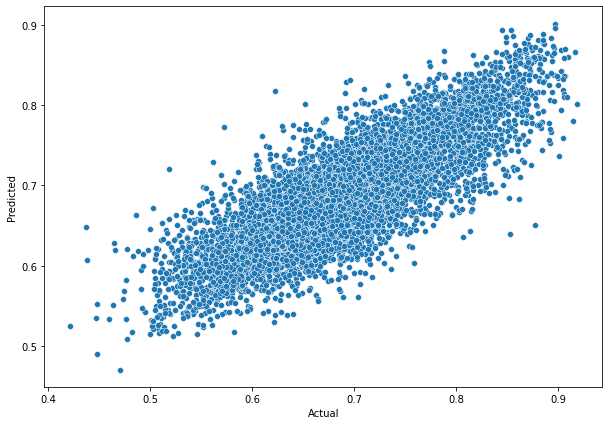

In [64]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=base, x='Actual', y='Predicted');

In [65]:
model0.get_feature_importance(prettified=True).head(10)

,Feature Id,Importances
0,DESKTOPS,15.248369
1,PUBLIC_SCHOOL_NO OFICIAL,15.212774
2,PUBLIC_SCHOOL_OFICIAL,15.210766
3,EVALUATED_LAST_3_YEARS,11.064012
4,LAPTOPS,10.527182
5,ENROLLED_LAST_3_YEARS,8.071459
6,TABLETS,4.640535
7,REGION_VALLE,1.958608
8,REGION_MAGDALENA,1.547807
9,REGION_SANTANDER,1.523417


In [66]:
pool1 = Pool(data=X, label=y)

In [67]:
shap_values = model0.get_feature_importance(pool1, type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

In [68]:
import shap

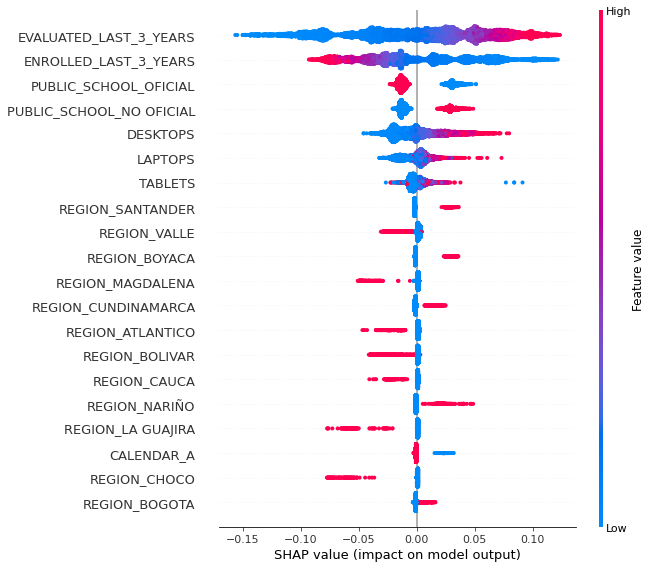

In [69]:
shap.summary_plot(shap_values, X)